# 🛡️ CICIDS2017: Cleaned & Preprocessed – ML Model Benchmarking

This notebook uses the **CICIDS2017: Cleaned & Preprocessed** dataset (53 features + Attack Type).  
We train and evaluate four ML models:

- **Random Forest**
- **XGBoost**
- **Support Vector Machine (SVM)**
- **MLP Neural Network**

We evaluate each using:
- Accuracy  
- Precision  
- Recall  
- F1-score  
- Confusion Matrix  
- Feature Importance (RF + XGB)

---


## 📦 1. Installing Required Packages

Before we begin our machine learning analysis, we need to ensure that all necessary Python libraries are installed with the correct versions. This section handles the installation of key dependencies.

### Installing Core ML Libraries

**Purpose:** Install specific versions of essential machine learning libraries to ensure compatibility and reproducibility.

**Packages being installed:**
- **scikit-learn (1.5.2):** Provides comprehensive machine learning algorithms including Random Forest, SVM, preprocessing tools, and evaluation metrics
- **imbalanced-learn (0.12.4):** Specialized library for handling imbalanced datasets through resampling techniques (SMOTE, RandomUnderSampler)
- **xgboost:** Implements the gradient boosting algorithm, known for high performance in classification tasks

**Why these versions?** Using specific versions ensures that the code runs consistently and prevents compatibility issues between different library versions.

The `--upgrade` flag updates packages if older versions exist, and `--quiet` suppresses installation messages for cleaner output.

In [1]:
%pip install --upgrade scikit-learn==1.5.2 imbalanced-learn==0.12.4 xgboost --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Installing Visualization and Data Manipulation Libraries

**Purpose:** Install libraries for data visualization and manipulation.

**Packages being installed:**
- **matplotlib:** Primary Python plotting library for creating static, animated, and interactive visualizations
- **seaborn:** Statistical data visualization library built on matplotlib, provides high-level interface for attractive graphics
- **pandas:** Essential library for data manipulation and analysis, provides DataFrame structure for handling tabular data

These libraries are crucial for:
- Loading and exploring the CICIDS2017 dataset
- Creating visualizations of class distributions, confusion matrices, and feature importances
- Analyzing model performance through various charts and plots

In [2]:
%pip install matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Additional Installation of imbalanced-learn

**Purpose:** Ensure imbalanced-learn is properly installed (redundant check).

This cell reinstalls imbalanced-learn, which may have been installed in the first cell. This could be a safety measure to ensure the package is available, or it might be a leftover from testing. In production, this redundant installation can be removed.

In [3]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 📚 2. Importing Libraries and Dependencies

This section imports all necessary modules and functions needed for our intrusion detection analysis. Each library serves a specific purpose in our machine learning pipeline.

### Import Statement Breakdown

**Purpose:** Load all required modules for data processing, model training, and evaluation.

**Core Libraries:**
- `numpy`: Numerical computing with array operations
- `pandas`: Data manipulation and analysis
- `matplotlib.pyplot`: Creating plots and visualizations
- `seaborn`: Statistical data visualization

**Scikit-learn Modules:**
- `train_test_split`: Splits data into training and testing sets
- `cross_val_score`: Performs k-fold cross-validation for model evaluation
- `RobustScaler`: Scales features using statistics robust to outliers (ideal for cybersecurity data)
- `LabelEncoder`: Converts text labels (attack types) to numerical format
- `classification_report, confusion_matrix`: Generate detailed performance metrics
- `accuracy_score, precision_score, recall_score, f1_score`: Individual metric calculators

**Machine Learning Models:**
- `RandomForestClassifier`: Ensemble method using multiple decision trees
- `XGBClassifier`: Gradient boosting algorithm for classification
- `LinearSVC`: Linear Support Vector Machine for classification
- `MLPClassifier`: Multi-Layer Perceptron (neural network)

**Imbalanced Data Handling:**
- `RandomUnderSampler`: Reduces majority class samples to balance dataset
- `SMOTE`: Synthetic Minority Over-sampling Technique creates synthetic samples for minority classes

**Utility:**
- `warnings.filterwarnings("ignore")`: Suppresses warning messages for cleaner output (use cautiously in production)

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


## 📊 3. Loading the Dataset

Now that we have all dependencies ready, we'll load the CICIDS2017 cleaned and preprocessed dataset.

### Reading the CSV File

**Purpose:** Load the preprocessed CICIDS2017 intrusion detection dataset into a pandas DataFrame.

**What this code does:**
1. Uses `pd.read_csv()` to read the CSV file from the specified path
2. Stores the data in a DataFrame object called `df`
3. Displays the first 5 rows using `head()` to verify successful loading

**About the Dataset:**
The CICIDS2017 dataset contains network traffic data with 53 features extracted from network flows, plus one target column ("Attack Type") indicating whether traffic is normal or represents a specific type of cyber attack.

**Key Dataset Characteristics:**
- Contains both benign (normal) and malicious network traffic
- Multiple attack types: DDoS, Port Scan, Infiltration, Web Attack, Botnet, etc.
- Features include packet statistics, flow duration, protocol information, and more
- Dataset has been cleaned and preprocessed (missing values handled, features normalized)

In [3]:
# Load CSV from Kaggle dataset folder
df = pd.read_csv("C:\\Users\\syedafraz\\Documents\\Model_Benchmarking\\cicids2017_cleaned.csv")

df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


## 🔍 4. Dataset Overview and Exploration

Understanding the dataset's structure, quality, and class distribution is crucial before building models. This section provides insights into the data we're working with.

### Dataset Shape, Missing Values, and Class Distribution

**Purpose:** Perform initial exploratory data analysis to understand dataset characteristics.

**What this code does:**

1. **Shape Analysis:**
   - `df.shape` returns a tuple (number_of_rows, number_of_columns)
   - Helps understand the dataset size and dimensionality

2. **Missing Value Check:**
   - `df.isnull().sum()` counts missing values in each column
   - Critical for data quality assessment
   - If missing values exist, we need to handle them before modeling

3. **Class Distribution Visualization:**
   - Creates a horizontal bar plot showing the count of each attack type
   - `sns.countplot(y=df['Attack Type'])` creates the visualization
   - `y=` parameter makes it horizontal for better readability with many categories
   - `figsize=(12,5)` sets the plot dimensions for clarity

**Why this matters:**
- **Class imbalance** is common in intrusion detection (normal traffic >> attack traffic)
- Imbalanced data can bias models toward predicting the majority class
- Understanding the distribution guides our choice of resampling strategies (SMOTE, undersampling)

Shape: (2520751, 53)

Missing values:
 Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Length of Fwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd Header Length              0
Bwd 

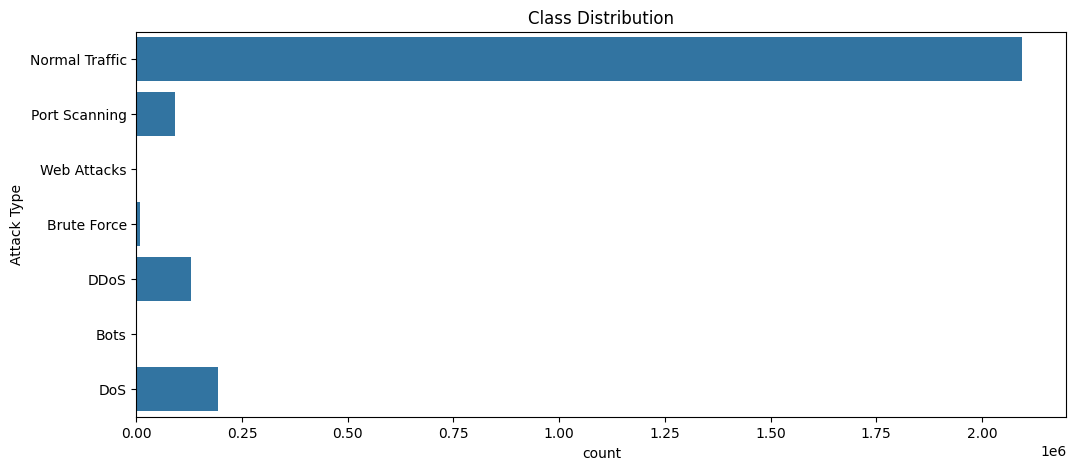

In [4]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Class distribution
plt.figure(figsize=(12,5))
sns.countplot(y=df['Attack Type'])
plt.title("Class Distribution")
plt.show()


In [5]:
# Checking the distribution of the target variable
df['Attack Type'].value_counts()

Attack Type
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64

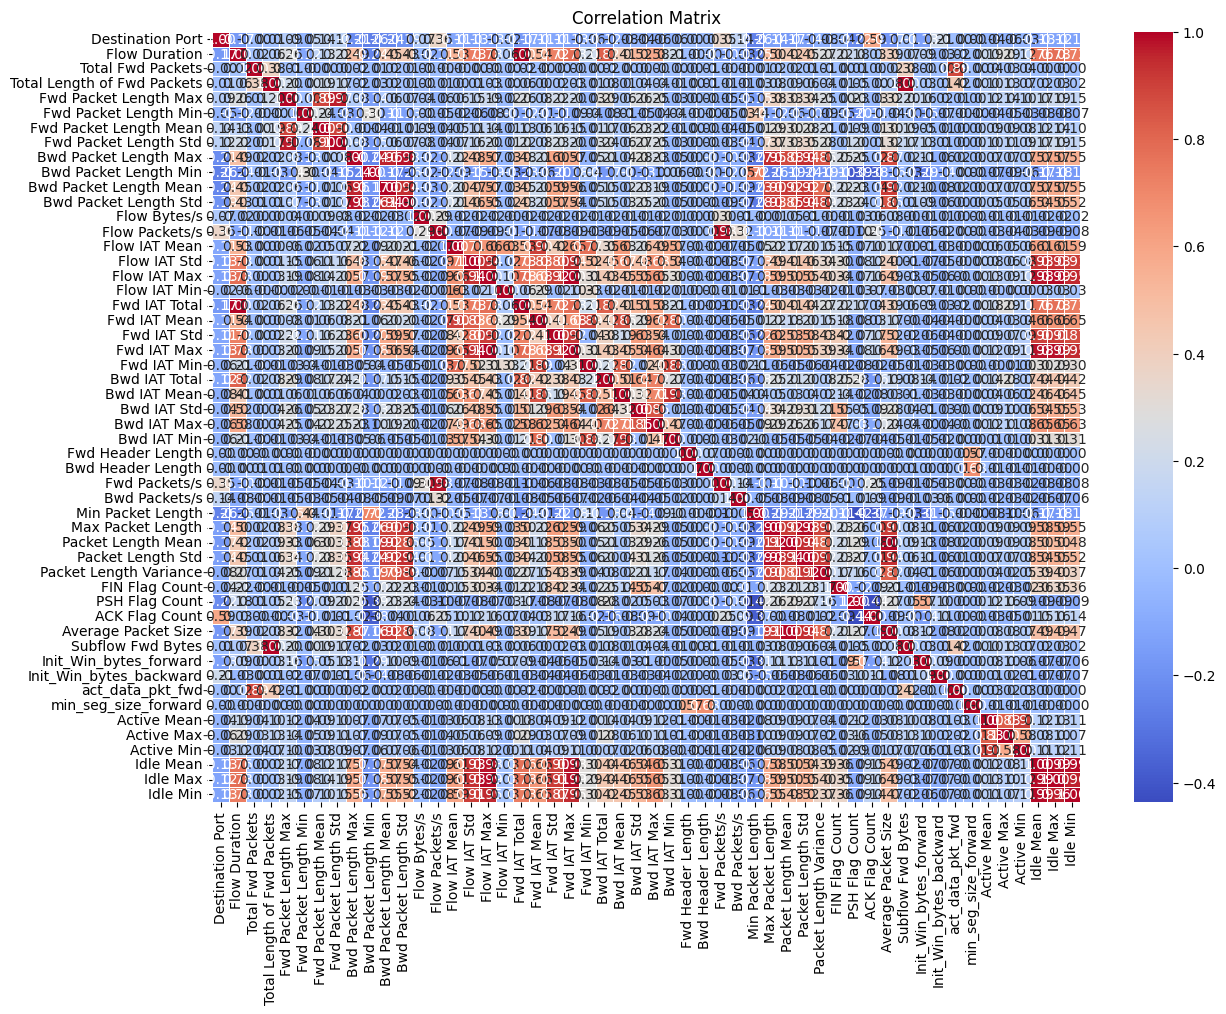

In [8]:
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


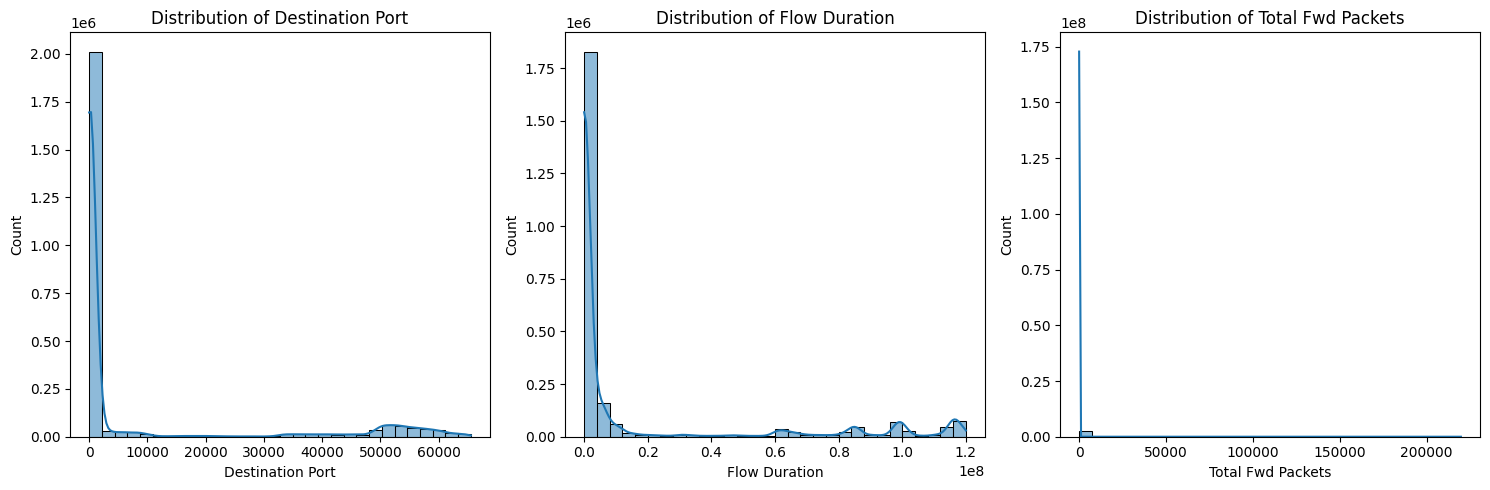

In [13]:
# 2. Distribution of the first 3 numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features[:3], 1):  # First 3 numeric features
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()



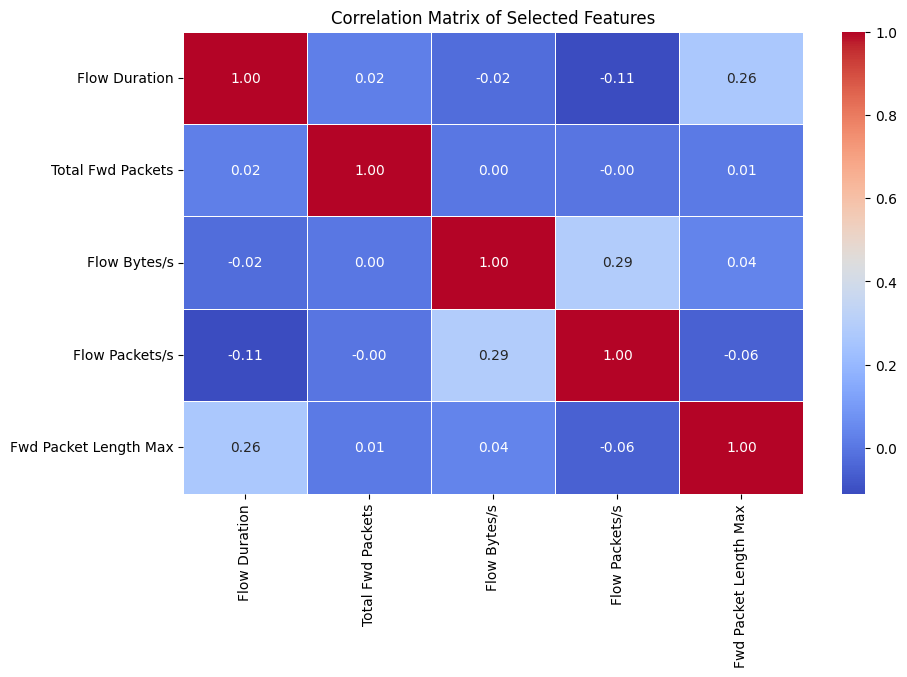

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
# 1. Correlation Matrix for Selected Features (shorter version)
# Select a few features for correlation analysis (e.g., top 10 features based on domain knowledge)
selected_features = ['Flow Duration', 'Total Fwd Packets', 'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packet Length Max']  # Example features

# Compute the correlation matrix for the selected features
corr_matrix_selected = df[selected_features].corr()

# Plotting the correlation matrix for selected features
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_selected, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()



### Detailed Class Distribution Analysis

**Purpose:** Get exact counts for each attack type in the dataset.

**What this code does:**
- `value_counts()` returns a Series with counts of unique values in the 'Attack Type' column
- Results are sorted in descending order by default (most frequent first)
- Provides numerical breakdown of how many samples exist for each class

**Why this is important:**
- Reveals the exact imbalance ratio between classes
- Helps determine appropriate sampling strategies:
  - If "Normal Traffic" has 1M samples but "Infiltration" has only 100, we need aggressive resampling
  - Guides us in setting `sampling_strategy` parameters for SMOTE and RandomUnderSampler
- Allows us to identify rare attack types that may need special handling

## 🔧 5. Data Preprocessing Pipeline

Before training models, we must prepare the data through several critical preprocessing steps: feature-target separation, label encoding, train-test splitting, and feature scaling.

### Feature Separation, Label Encoding, and Train-Test Split

**Purpose:** Prepare data for machine learning by separating features from labels, encoding categorical targets, splitting data, and scaling features.

**Step-by-Step Breakdown:**

**1. Feature-Target Separation:**
```python
X = df.drop("Attack Type", axis=1)  # Features (all columns except target)
y = df["Attack Type"]                 # Target (attack type labels)
```
- `X` contains all 53 network traffic features used for prediction
- `y` contains the attack type labels we want to predict

**2. Label Encoding:**
```python
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
```
- Converts text labels (e.g., "Normal Traffic", "DDoS") to integers (0, 1, 2, ...)
- Machine learning models require numerical inputs, not strings
- `fit_transform()` learns the mapping and applies it in one step
- The encoder remembers the mapping for later use (e.g., converting predictions back to text)

**3. Train-Test Split:**
```python
train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
```
- Splits data into 80% training, 20% testing
- `random_state=42`: Ensures reproducibility (same split every time)
- `stratify=y_encoded`: Maintains class distribution in both sets (critical for imbalanced data)
  - If dataset has 70% Normal, 20% DDoS, 10% other, both train and test will have same proportions

**4. Feature Scaling:**
```python
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
- **Why RobustScaler?** It uses median and IQR (interquartile range) instead of mean/std
  - More robust to outliers, which are common in network traffic data
  - Anomalous traffic (attacks) can have extreme values
- **fit_transform vs transform:**
  - `fit_transform` on training data: Learn scaling parameters from training data
  - `transform` on test data: Apply the same scaling (prevents data leakage)
- **Why scale?** 
  - SVM and MLP are sensitive to feature magnitudes
  - Features like "packet count" (0-10000) vs "flow duration" (0-1) need normalization
  - Tree-based models (RF, XGBoost) don't strictly need scaling but it can help

In [8]:
# Separate features and target
X = df.drop("Attack Type", axis=1)
y = df["Attack Type"]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features (important for SVM & MLP)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## ⚖️ 6. Handling Class Imbalance with Resampling

Class imbalance is a major challenge in intrusion detection. We'll use undersampling and oversampling (SMOTE) to create balanced datasets for optimal model training.

### Understanding the Class Labels

**Purpose:** Inspect the attack types that were encoded and identify the "Normal Traffic" class ID.

**What this code does:**
- `label_encoder.classes_` returns an array of all unique attack types in the order they were encoded
- Shows the mapping between numerical IDs and attack type names
- Example output might be: `['Bot', 'DDoS', 'Infiltration', 'Normal Traffic', 'Port Scan', ...]`

**Why we need this:**
We need to know which numerical ID represents "Normal Traffic" because:
- Normal traffic is typically the majority class (highly imbalanced)
- We'll specifically target it for undersampling to reduce its dominance
- Different sampling strategies will be applied to normal vs. attack traffic

In [9]:
label_encoder.classes_


array(['Bots', 'Brute Force', 'DDoS', 'DoS', 'Normal Traffic',
       'Port Scanning', 'Web Attacks'], dtype=object)

### Finding the Normal Traffic Class ID

**Purpose:** Programmatically find the numerical ID assigned to "Normal Traffic" class.

**What this code does:**
```python
np.where(label_encoder.classes_ == "Normal Traffic")[0][0]
```
- `label_encoder.classes_ == "Normal Traffic"` creates a boolean array (True where match found)
- `np.where()` returns indices where condition is True
- `[0][0]` extracts the first index (as it returns a nested array)
- Stores the result in `normal_class_id` variable

**Example:**
If classes are `['Attack1', 'Attack2', 'Normal Traffic', 'Attack3']`, this would return `2`.

**Why this matters:**
This ID will be used in the next cell to specify how many "Normal Traffic" samples to keep during undersampling.

In [10]:
normal_class_id = np.where(label_encoder.classes_ == "Normal Traffic")[0][0]
normal_class_id

4

### Random Undersampling for Class Balance

**Purpose:** Reduce the number of "Normal Traffic" samples to address extreme class imbalance, applied to both raw and scaled datasets.

**What this code does:**

**1. Undersample Training Data (Raw Features):**
```python
RandomUnderSampler(sampling_strategy={normal_class_id: 200000}, random_state=42)
```
- Reduces "Normal Traffic" samples to exactly 200,000
- Keeps ALL samples from minority classes (attack types)
- `random_state=42` ensures reproducibility
- Creates `X_train_resampled` and `y_train_resampled`

**2. Undersample Test Data (Balanced):**
```python
rus_test = RandomUnderSampler(random_state=42)
```
- Applies undersampling to test set without specific strategy
- Balances all classes equally in test set
- Creates `X_test_balanced` and `y_test_balanced`

**3. Undersample Scaled Training Data:**
```python
RandomUnderSampler(sampling_strategy={normal_class_id: 200000}, ...)
```
- Applies same undersampling to scaled features (`X_train_scaled`)
- Creates `X_train_scaled` and `y_train_scaled`
- Needed for models that require scaled features (SVM, MLP)

**4. Undersample Scaled Test Data:**
```python
rus_test.fit_resample(X_test_scaled, y_test)
```
- Creates `X_test_scaled_balanced` and `y_test_scaled_balanced`
- Maintains consistency between raw and scaled data

**Why Undersample?**
- Original dataset might have millions of normal samples vs thousands of attacks
- Training on imbalanced data causes models to predict "Normal" for everything
- Undersampling creates a more balanced training environment
- Trade-off: We lose some normal traffic data, but gain better attack detection

**Note:** We keep 200,000 normal samples (not complete undersampling) to:
- Maintain sufficient normal traffic patterns for the model to learn
- Avoid losing too much information about benign behavior
- Balance between computational efficiency and model performance

In [11]:
# Initializing the undersampling for the clean df
X_train_resampled, y_train_resampled = RandomUnderSampler(sampling_strategy={normal_class_id: 200000}, random_state=42).fit_resample(X_train, y_train)
rus_test = RandomUnderSampler(random_state=42)
X_test_balanced, y_test_balanced = rus_test.fit_resample(X_test, y_test)

# Initializing the undersampling for the scaled df
X_train_scaled, y_train_scaled = RandomUnderSampler(sampling_strategy={normal_class_id: 200000}, random_state=42).fit_resample(X_train_scaled, y_train)
X_test_scaled_balanced, y_test_scaled_balanced = rus_test.fit_resample(X_test_scaled, y_test)

### SMOTE Oversampling for Minority Classes

**Purpose:** Use Synthetic Minority Over-sampling Technique (SMOTE) to create synthetic samples for underrepresented attack types.

**What this code does:**
```python
SMOTE(sampling_strategy={0: 2000, 6: 2000, 1: 8000, 5: 80000, 2:130000, 3: 200000}, ...)
```
- Creates synthetic samples for minority classes by interpolating between existing samples
- `sampling_strategy` dictionary specifies target sample counts for each class ID:
  - Classes 0 and 6: Increase to 2,000 samples (very rare attacks)
  - Class 1: Increase to 8,000 samples (rare attacks)
  - Class 5: Increase to 80,000 samples (moderately rare)
  - Class 2: Increase to 130,000 samples (less common)
  - Class 3: Increase to 200,000 samples (likely Normal Traffic, to match undersampling)
- `random_state=42` ensures reproducibility

**How SMOTE Works:**
1. For each minority class sample, finds k-nearest neighbors
2. Creates synthetic samples by interpolating between the sample and its neighbors
3. Generates new samples along the line segments connecting minority class instances
4. Does NOT simply duplicate existing samples (avoids overfitting)

**Why Use SMOTE?**
- **Undersampling alone** loses information by discarding majority class data
- **SMOTE** enriches minority classes without losing majority class information
- Creates more diverse training examples for rare attack types
- Helps model learn decision boundaries better for underrepresented attacks

**Combined Strategy:**
- Undersampling reduced Normal Traffic to 200,000
- SMOTE increases rare attacks to meaningful counts
- Result: More balanced dataset with diverse examples across all attack types

**Applied to:** Scaled training data (`X_train_scaled`) because SMOTE works better with normalized features (distance-based algorithm).

In [12]:
# Initializing the oversampling for the scaled df
X_train_resampled_scaled, y_train_resampled_scaled = SMOTE(sampling_strategy={0: 2000, 6: 2000, 1: 8000, 5: 80000, 2:130000, 3: 200000}, random_state=42).fit_resample(X_train_scaled, y_train_scaled)

### Visualizing the Resampled Class Distribution

**Purpose:** Verify that our resampling strategy successfully balanced the classes.

**What this code does:**
- Creates a horizontal bar chart of class distribution after SMOTE
- `y=y_train_resampled_scaled` shows counts for each class ID (0, 1, 2, ...)
- `figsize=(12,5)` sets appropriate plot dimensions

**What to look for:**
- Classes should be more evenly distributed compared to the original dataset
- Very rare classes (IDs 0, 6) should now have around 2,000 samples
- Common classes should have similar counts (around 80k-200k range)
- This visualization confirms our sampling strategy worked as intended

**Why this matters:**
- Visual confirmation prevents silent failures in resampling
- Ensures models will see balanced examples during training
- Helps identify if any class was missed or incorrectly sampled

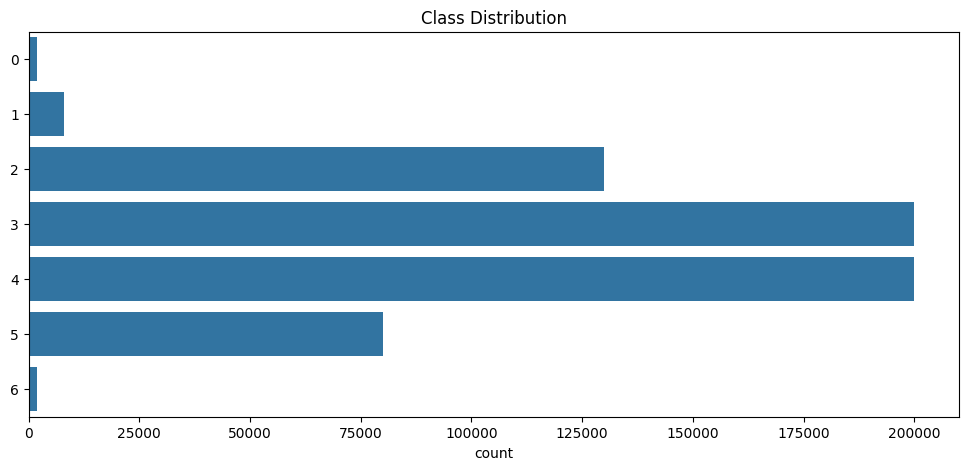

In [13]:
# Class distribution
plt.figure(figsize=(12,5))
sns.countplot(y=y_train_resampled_scaled)
plt.title("Class Distribution")
plt.show()

## 🌲 7. Model Training and Evaluation

Now we'll train four different machine learning models and evaluate their performance on intrusion detection. We start with Random Forest.

### 7.1 Random Forest Classifier

#### Training Random Forest and Initial Evaluation

**Purpose:** Train a Random Forest classifier and generate a comprehensive classification report.

**What this code does:**

**1. Model Configuration:**
```python
RandomForestClassifier(n_estimators=20, max_depth=15, random_state=20, n_jobs=-1)
```
- `n_estimators=20`: Creates 20 decision trees in the forest (ensemble)
- `max_depth=15`: Limits tree depth to prevent overfitting
- `random_state=20`: Ensures reproducibility
- `n_jobs=-1`: Uses all CPU cores for parallel processing (faster training)

**2. Training:**
```python
rf.fit(X_train_resampled, y_train_resampled)
```
- Trains on undersampled data (200,000 normal traffic + all attacks)
- Uses raw features (not scaled) because tree-based models don't require scaling
- Each tree learns patterns to distinguish between attack types

**3. Prediction:**
```python
rf_pred = rf.predict(X_test_balanced)
```
- Makes predictions on balanced test set
- Returns predicted class ID for each test sample

**4. Classification Report:**
```python
classification_report(y_test_balanced, rf_pred, target_names=label_encoder.classes_)
```
- Generates detailed metrics for each attack type:
  - **Precision:** Of all predicted as "Attack X", what % were actually "Attack X"?
  - **Recall:** Of all actual "Attack X", what % did we detect?
  - **F1-score:** Harmonic mean of precision and recall (balanced metric)
  - **Support:** Number of actual samples for each class in test set

**Why Random Forest?**
- Handles non-linear relationships well (network attacks have complex patterns)
- Resistant to overfitting through ensemble averaging
- Provides feature importance (helps understand which network features matter)
- Fast training and prediction
- Works well with imbalanced data after resampling

In [14]:
rf = RandomForestClassifier(n_estimators=20, max_depth=15, random_state=20, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

rf_pred = rf.predict(X_test_balanced)

print("=== Random Forest ===")
print(classification_report(y_test_balanced, rf_pred, target_names=label_encoder.classes_))


=== Random Forest ===
                precision    recall  f1-score   support

          Bots       1.00      0.80      0.89       389
   Brute Force       1.00      1.00      1.00       389
          DDoS       1.00      1.00      1.00       389
           DoS       0.99      1.00      0.99       389
Normal Traffic       0.82      1.00      0.90       389
 Port Scanning       1.00      1.00      1.00       389
   Web Attacks       1.00      0.97      0.99       389

      accuracy                           0.97      2723
     macro avg       0.97      0.97      0.97      2723
  weighted avg       0.97      0.97      0.97      2723



#### Random Forest: Cross-Validation and Confusion Matrix

**Purpose:** Perform comprehensive evaluation of Random Forest using cross-validation and visualization.

**What this code does:**

**1. Cross-Validation:**
```python
cross_val_score(rf, X_train_resampled, y_train_resampled, cv=3)
```
- Performs 3-fold cross-validation on training data
- Splits training data into 3 parts, trains on 2, validates on 1, repeats 3 times
- Returns array of 3 accuracy scores
- `cv_mean_rf`: Average performance across all folds
- `cv_std_rf`: Standard deviation (shows consistency/stability)

**Why Cross-Validation?**
- Test set is only evaluated once (can't trust single evaluation)
- CV gives more reliable estimate of model performance
- Helps detect overfitting (high training accuracy, low CV accuracy = overfitting)
- Shows if model performance is stable or varies widely

**2. Test Accuracy:**
```python
accuracy_score(y_test_balanced, rf_pred)
```
- Calculates percentage of correct predictions on test set
- Final metric on unseen data

**3. Confusion Matrix:**
```python
confusion_matrix(y_test_balanced, rf_pred)
```
- Creates matrix showing actual vs predicted classes
- Rows = actual labels, Columns = predicted labels
- Diagonal elements = correct predictions
- Off-diagonal = misclassifications

**Confusion Matrix Visualization:**
- `sns.heatmap()` creates color-coded matrix
- `annot=True`: Shows numbers in each cell
- `fmt='d'`: Formats as integers
- Darker blue = higher count
- Helps identify which attack types are confused with each other
  - Example: If "Port Scan" is often predicted as "Normal", we see high value in that cell

=== Random Forest ===
Cross-validation Avg Score: 0.9983 ± 0.0001
Test Accuracy: 0.9662


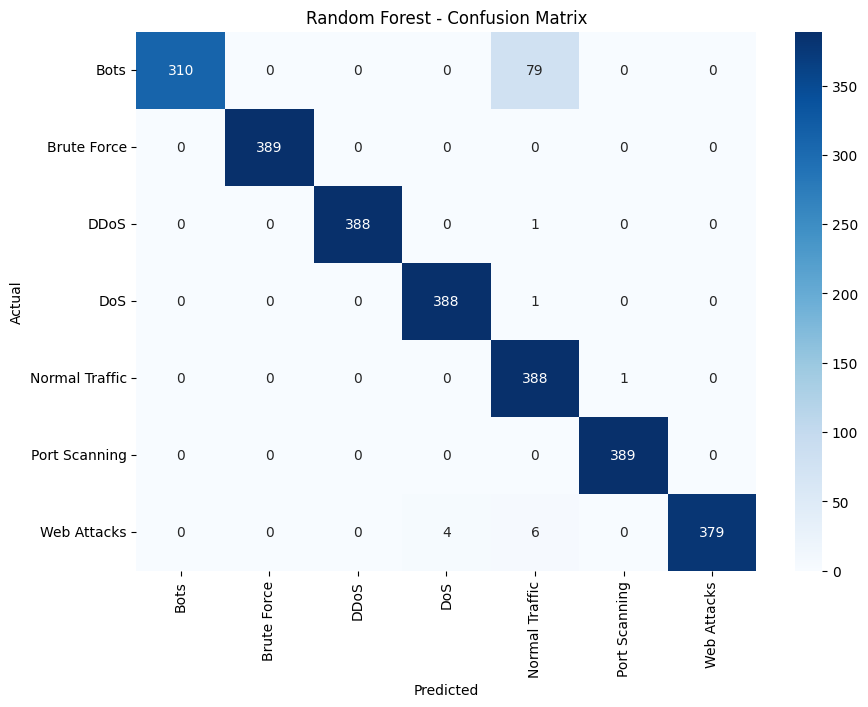

In [15]:
# === Random Forest Evaluation ===

# Cross-validation
cv_scores_rf = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=3)
cv_mean_rf = np.mean(cv_scores_rf)
cv_std_rf = np.std(cv_scores_rf)

print("=== Random Forest ===")
print(f"Cross-validation Avg Score: {cv_mean_rf:.4f} ± {cv_std_rf:.4f}")

# Accuracy
accuracy_rf = accuracy_score(y_test_balanced, rf_pred)
print(f"Test Accuracy: {accuracy_rf:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test_balanced, rf_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()


### 7.2 XGBoost Classifier

#### Training XGBoost and Initial Evaluation

**Purpose:** Train an XGBoost (eXtreme Gradient Boosting) classifier, a powerful gradient boosting algorithm.

**What this code does:**

**1. Model Configuration:**
```python
XGBClassifier(
    n_estimators=30,      # Number of boosting rounds (trees)
    learning_rate=0.1,    # Step size shrinkage (prevents overfitting)
    max_depth=5,          # Maximum tree depth
    subsample=0.8,        # Fraction of samples used per tree (80%)
    colsample_bytree=0.8, # Fraction of features used per tree (80%)
    eval_metric="mlogloss" # Multiclass log loss evaluation
)
```

**Parameter Explanation:**
- `n_estimators=30`: Builds 30 trees sequentially, each correcting previous errors
- `learning_rate=0.1`: Controls how much each tree contributes (lower = more conservative)
- `max_depth=5`: Shallower trees than RF to prevent overfitting
- `subsample=0.8`: Each tree uses random 80% of samples (adds randomness/robustness)
- `colsample_bytree=0.8`: Each tree uses random 80% of features (prevents feature dominance)
- `eval_metric="mlogloss"`: Optimizes for multiclass classification

**2. Training:**
```python
xgb.fit(X_train_resampled, y_train_resampled)
```
- Uses same resampled data as Random Forest
- Builds trees sequentially (unlike RF which builds in parallel)
- Each new tree focuses on samples previous trees got wrong

**3. Prediction and Reporting:**
- Predicts on balanced test set
- Generates classification report with precision, recall, F1-score per class

**XGBoost vs Random Forest:**
- **XGBoost**: Sequential boosting, each tree corrects previous errors
- **Random Forest**: Parallel bagging, independent trees vote
- **XGBoost**: Often higher accuracy, more tuning needed
- **Random Forest**: Faster to train, easier to tune
- Both excellent for tabular data like network traffic features

In [16]:
xgb = XGBClassifier(
    n_estimators=30,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss"
)
xgb.fit(X_train_resampled, y_train_resampled)

xgb_pred = xgb.predict(X_test_balanced)

print("=== XGBoost ===")
print(classification_report(y_test_balanced, xgb_pred, target_names=label_encoder.classes_))


=== XGBoost ===
                precision    recall  f1-score   support

          Bots       1.00      0.93      0.96       389
   Brute Force       1.00      1.00      1.00       389
          DDoS       1.00      1.00      1.00       389
           DoS       0.96      1.00      0.98       389
Normal Traffic       0.88      1.00      0.94       389
 Port Scanning       1.00      1.00      1.00       389
   Web Attacks       1.00      0.90      0.95       389

      accuracy                           0.97      2723
     macro avg       0.98      0.97      0.97      2723
  weighted avg       0.98      0.97      0.97      2723



#### XGBoost: Cross-Validation and Confusion Matrix

**Purpose:** Comprehensive evaluation of XGBoost performance with cross-validation and confusion matrix visualization.

**What this code does:**

**1. Cross-Validation:**
- 3-fold cross-validation on training data
- Provides mean and standard deviation of performance
- Validates model generalization capability

**2. Test Set Accuracy:**
- Final accuracy on held-out test set
- Real-world performance estimate

**3. Confusion Matrix Visualization:**
- Heatmap showing prediction patterns
- Helps identify which attack types XGBoost struggles with
- Compare with Random Forest confusion matrix to see differences
  - XGBoost might perform better on certain attack types
  - Reveals complementary strengths between models

**Interpretation Tips:**
- **High diagonal values:** Model correctly identifies that attack type
- **High off-diagonal values:** Confusion between two attack types
  - Example: DDoS vs DoS might be confused due to similar network patterns
- **Compare XGBoost vs RF:** See which model better distinguishes specific attacks


=== XGBoost ===
Cross-validation Mean: 0.9973 ± 0.0001
=== XGBoost ===
Test Accuracy: 0.9743


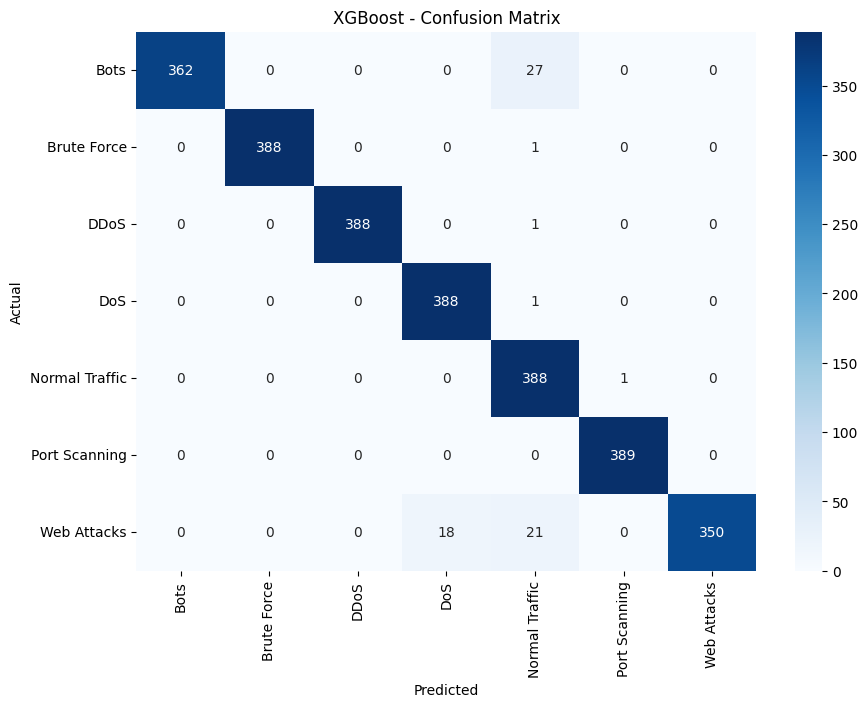

In [17]:
# === XGBoost Evaluation ===

cv_xgb = cross_val_score(xgb, X_train_resampled, y_train_resampled, cv=3)
print("\n=== XGBoost ===")
print(f"Cross-validation Mean: {cv_xgb.mean():.4f} ± {cv_xgb.std():.4f}")

accuracy_xgb = accuracy_score(y_test_balanced, xgb_pred)
print("=== XGBoost ===")
print(f"Test Accuracy: {accuracy_xgb:.4f}")

cm_xgb = confusion_matrix(y_test_balanced, xgb_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()


### 7.3 Support Vector Machine (SVM)

#### Training Linear SVM

**Purpose:** Train a Support Vector Machine with linear kernel for intrusion detection.

**What this code does:**

**1. Model Configuration:**
```python
LinearSVC()
```
- Uses linear kernel (computationally efficient for high-dimensional data)
- Finds optimal hyperplane to separate classes in feature space
- Default parameters used (can be tuned with C, max_iter, etc.)

**2. Training on Scaled Data:**
```python
svm.fit(X_train_resampled_scaled, y_train_resampled_scaled)
```
- **Critical:** Uses SMOTE-resampled and scaled data
- SVM is **highly sensitive** to feature scales
- RobustScaler ensures all features contribute equally
- Uses data with synthetic samples for better minority class learning

**3. Prediction:**
```python
svm_pred = svm.predict(X_test_scaled_balanced)
```
- Predicts on scaled and balanced test set
- Must use same scaling as training (already applied)

**Why LinearSVC?**
- **Efficient:** Much faster than kernel SVM for large datasets
- **High-dimensional:** Works well with 53 features
- **Binary decisions:** Creates clear decision boundaries between classes
- **Multiclass:** Automatically handles multiple attack types (one-vs-rest strategy)

**Key Differences from Tree Models:**
- **Requires scaling:** Unlike RF/XGBoost
- **Linear boundaries:** May struggle with complex non-linear patterns
- **Margin-based:** Focuses on samples near decision boundary (support vectors)
- **Different strengths:** May excel where tree models struggle and vice versa

In [18]:

svm = LinearSVC()
svm.fit(X_train_resampled_scaled, y_train_resampled_scaled)

svm_pred = svm.predict(X_test_scaled_balanced)

print("=== SVM ===")
print(classification_report(y_test_scaled_balanced, svm_pred, target_names=label_encoder.classes_))


=== SVM ===
                precision    recall  f1-score   support

          Bots       0.00      0.00      0.00       389
   Brute Force       0.00      0.00      0.00       389
          DDoS       0.73      0.25      0.37       389
           DoS       0.50      0.87      0.63       389
Normal Traffic       0.15      0.57      0.24       389
 Port Scanning       0.01      0.01      0.01       389
   Web Attacks       0.00      0.00      0.00       389

      accuracy                           0.24      2723
     macro avg       0.20      0.24      0.18      2723
  weighted avg       0.20      0.24      0.18      2723



#### SVM: Cross-Validation and Confusion Matrix

**Purpose:** Evaluate SVM performance through cross-validation and confusion matrix analysis.

**What this code does:**

**1. Cross-Validation:**
- 3-fold CV on SMOTE-resampled scaled training data
- Tests generalization on synthetic and real data mix
- Important: CV includes synthetic samples (may affect scores)

**2. Test Accuracy:**
- Performance on real test data (no synthetic samples)
- More realistic estimate of deployment performance

**3. Confusion Matrix:**
- Shows SVM's classification patterns
- Compare with tree-based models:
  - **SVM strengths:** May better separate linearly separable attack types
  - **SVM weaknesses:** May struggle with complex non-linear attack patterns
  - **Different confusions:** SVM might confuse different attack pairs than RF/XGBoost

**Expected Behavior:**
- SVM often performs well on:
  - Attack types with distinct feature value ranges
  - Classes separated by clear linear boundaries
- May struggle with:
  - Attack types requiring complex decision boundaries
  - Classes with overlapping feature distributions

**Comparison Note:**
This is a good opportunity to see how different algorithms (tree-based vs. margin-based) approach the same problem differently.


=== SVM ===
Cross-validation Mean: 0.4902 ± 0.0040
=== SVM ===
Test Accuracy: 0.2431


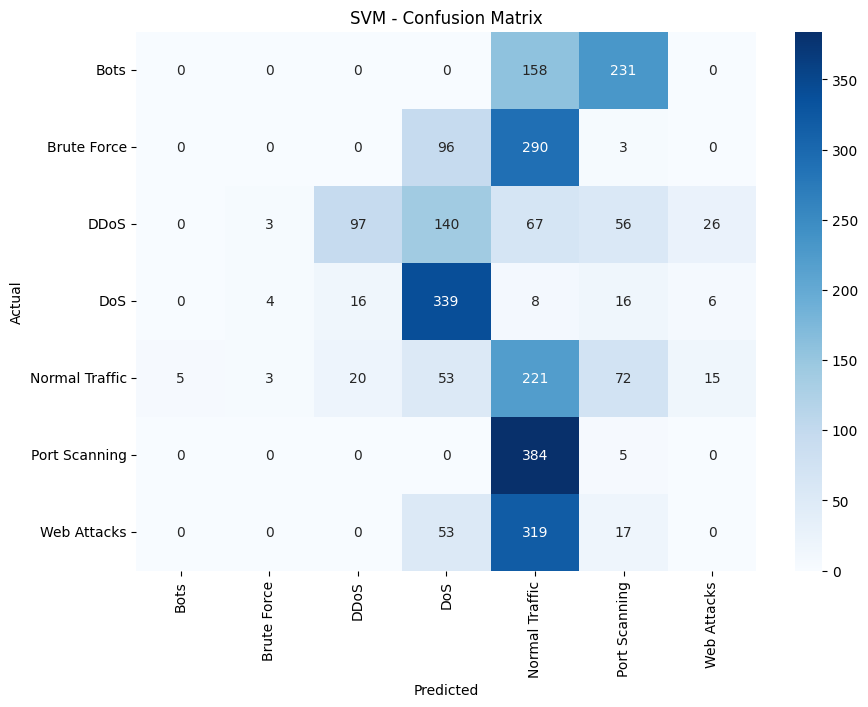

In [19]:
# === SVM Evaluation ===
cv_svm = cross_val_score(svm, X_train_resampled_scaled, y_train_resampled_scaled, cv=3)
print("\n=== SVM ===")
print(f"Cross-validation Mean: {cv_svm.mean():.4f} ± {cv_svm.std():.4f}")

accuracy_svm = accuracy_score(y_test_scaled_balanced, svm_pred)
print("=== SVM ===")
print(f"Test Accuracy: {accuracy_svm:.4f}")

cm_svm = confusion_matrix(y_test_scaled_balanced, svm_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm_svm, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM - Confusion Matrix")
plt.show()


### 7.4 Multi-Layer Perceptron (Neural Network)

#### Training MLP Classifier

**Purpose:** Train a neural network (Multi-Layer Perceptron) for intrusion detection.

**What this code does:**

**1. Model Configuration:**
```python
MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=42)
```
- `hidden_layer_sizes=(128, 64)`: Two hidden layers
  - **First layer:** 128 neurons
  - **Second layer:** 64 neurons
  - Architecture: 53 inputs → 128 neurons → 64 neurons → 7 outputs (attack types)
- `max_iter=20`: Maximum 20 training epochs (iterations over full dataset)
- `random_state=42`: Reproducible weight initialization

**Neural Network Architecture:**
```
Input Layer (53 features)
    ↓
Hidden Layer 1 (128 neurons, ReLU activation)
    ↓
Hidden Layer 2 (64 neurons, ReLU activation)
    ↓
Output Layer (7 classes, softmax activation)
```

**2. Training:**
```python
mlp.fit(X_train_resampled_scaled, y_train_resampled_scaled)
```
- Uses SMOTE-resampled scaled data (critical for neural networks)
- Backpropagation adjusts weights to minimize classification error
- Multiple epochs allow network to learn complex patterns

**3. Prediction:**
- Forward pass through network layers
- Output layer produces probability for each attack type
- Highest probability determines predicted class

**Why MLP?**
- **Non-linear:** Can learn complex patterns trees and SVM might miss
- **Deep learning:** Multiple layers extract hierarchical features
- **Flexible:** Architecture can be adjusted for performance
- **Universal approximator:** Theoretically can approximate any function

**Considerations:**
- Requires scaled data (sensitive to feature magnitudes)
- More hyperparameters to tune (layers, neurons, learning rate, etc.)
- Can overfit if not properly regularized
- Computationally expensive for training (but fast for prediction)

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=42)
mlp.fit(X_train_resampled_scaled, y_train_resampled_scaled)

mlp_pred = mlp.predict(X_test_scaled_balanced)

print("=== MLP Neural Network ===")
print(classification_report(y_test_scaled_balanced, mlp_pred, target_names=label_encoder.classes_))


=== MLP Neural Network ===
                precision    recall  f1-score   support

          Bots       1.00      0.33      0.50       389
   Brute Force       1.00      0.99      1.00       389
          DDoS       1.00      0.59      0.74       389
           DoS       0.53      1.00      0.70       389
Normal Traffic       0.67      0.83      0.74       389
 Port Scanning       0.99      0.99      0.99       389
   Web Attacks       1.00      0.97      0.98       389

      accuracy                           0.81      2723
     macro avg       0.88      0.81      0.81      2723
  weighted avg       0.88      0.81      0.81      2723



#### MLP: Cross-Validation and Confusion Matrix

**Purpose:** Comprehensive evaluation of the neural network's performance.

**What this code does:**

**1. Cross-Validation:**
- 3-fold CV on SMOTE-resampled scaled data
- Tests neural network generalization
- Important: With only 20 epochs, CV might show variability
  - Low variance = consistent learning
  - High variance = may need more epochs or regularization

**2. Test Accuracy:**
- Final performance on unseen test data
- Most important metric for real-world deployment

**3. Confusion Matrix:**
- Reveals neural network's classification patterns
- Interesting comparison with other models:
  - **MLP** might capture patterns missed by linear models (SVM)
  - **MLP** might outperform trees on certain complex attack types
  - **MLP** might show different confusion patterns

**Expected Patterns:**
- Neural networks often excel at:
  - Attack types with subtle, complex feature interactions
  - Classes requiring non-linear decision boundaries
- May struggle with:
  - Very rare classes (even with SMOTE)
  - Classes with limited training examples

**Performance Note:**
With only 20 epochs, the network may not be fully trained. In production:
- Increase `max_iter` to 100-200
- Monitor validation loss to prevent overfitting
- Consider early stopping and learning rate schedules


=== MLP Neural Network ===
Cross-validation Mean: 0.8467 ± 0.0013
=== MLP Neural Network ===
Test Accuracy: 0.8142


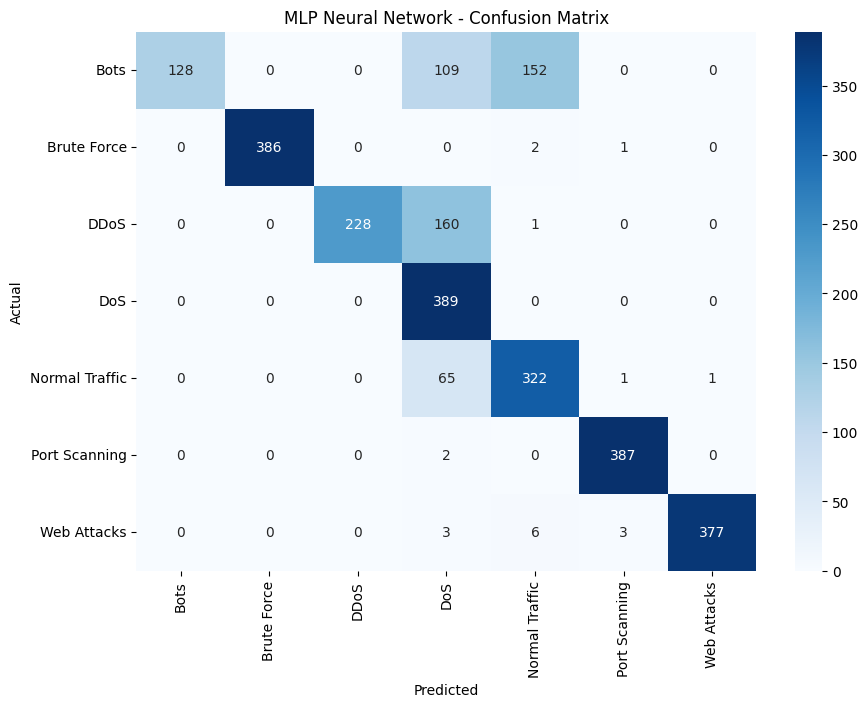

In [21]:
# === MLP Evaluation ===
cv_mlp = cross_val_score(mlp, X_train_resampled_scaled, y_train_resampled_scaled, cv=3)
print("\n=== MLP Neural Network ===")
print(f"Cross-validation Mean: {cv_mlp.mean():.4f} ± {cv_mlp.std():.4f}")

accuracy_mlp = accuracy_score(y_test_scaled_balanced, mlp_pred)
print("=== MLP Neural Network ===")
print(f"Test Accuracy: {accuracy_mlp:.4f}")

cm_mlp = confusion_matrix(y_test_scaled_balanced, mlp_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm_mlp, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP Neural Network - Confusion Matrix")
plt.show()


## 📊 8. Model Comparison - Confusion Matrices

### Side-by-Side Confusion Matrix Visualization

**Purpose:** Compare all four models' confusion matrices in a single visualization for easy comparison.

**What this code does:**

**1. Model Dictionary:**
```python
models = {
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred,
    "SVM": svm_pred,
    "MLP": mlp_pred
}
```
- Organizes all predictions for iteration
- Consistent naming for subplot titles

**2. Subplot Grid:**
```python
plt.subplot(2,2,i)
```
- Creates 2x2 grid (4 subplots)
- Each model gets one confusion matrix
- Layout: RF (top-left), XGBoost (top-right), SVM (bottom-left), MLP (bottom-right)

**3. Visualization:**
- `annot=False`: Hides numbers for cleaner overview (large matrices get cluttered)
- Color intensity shows magnitude
- Same color scale across all models for fair comparison

**What to Look For:**
1. **Diagonal Brightness:** Darker diagonal = better overall performance
2. **Off-diagonal Patterns:** Reveals which attack types are confused
3. **Model Differences:**
   - Which models have similar confusion patterns?
   - Which models excel on different attack types?
4. **Complementary Strengths:** If models confuse different attack pairs, they could be combined in an ensemble

**Interpretation Strategy:**
- **Brightest diagonals:** Best performing models
- **Specific attack struggles:** If all models have weak spots in same row/column
- **Model selection:** Choose based on which attacks are most critical in your use case

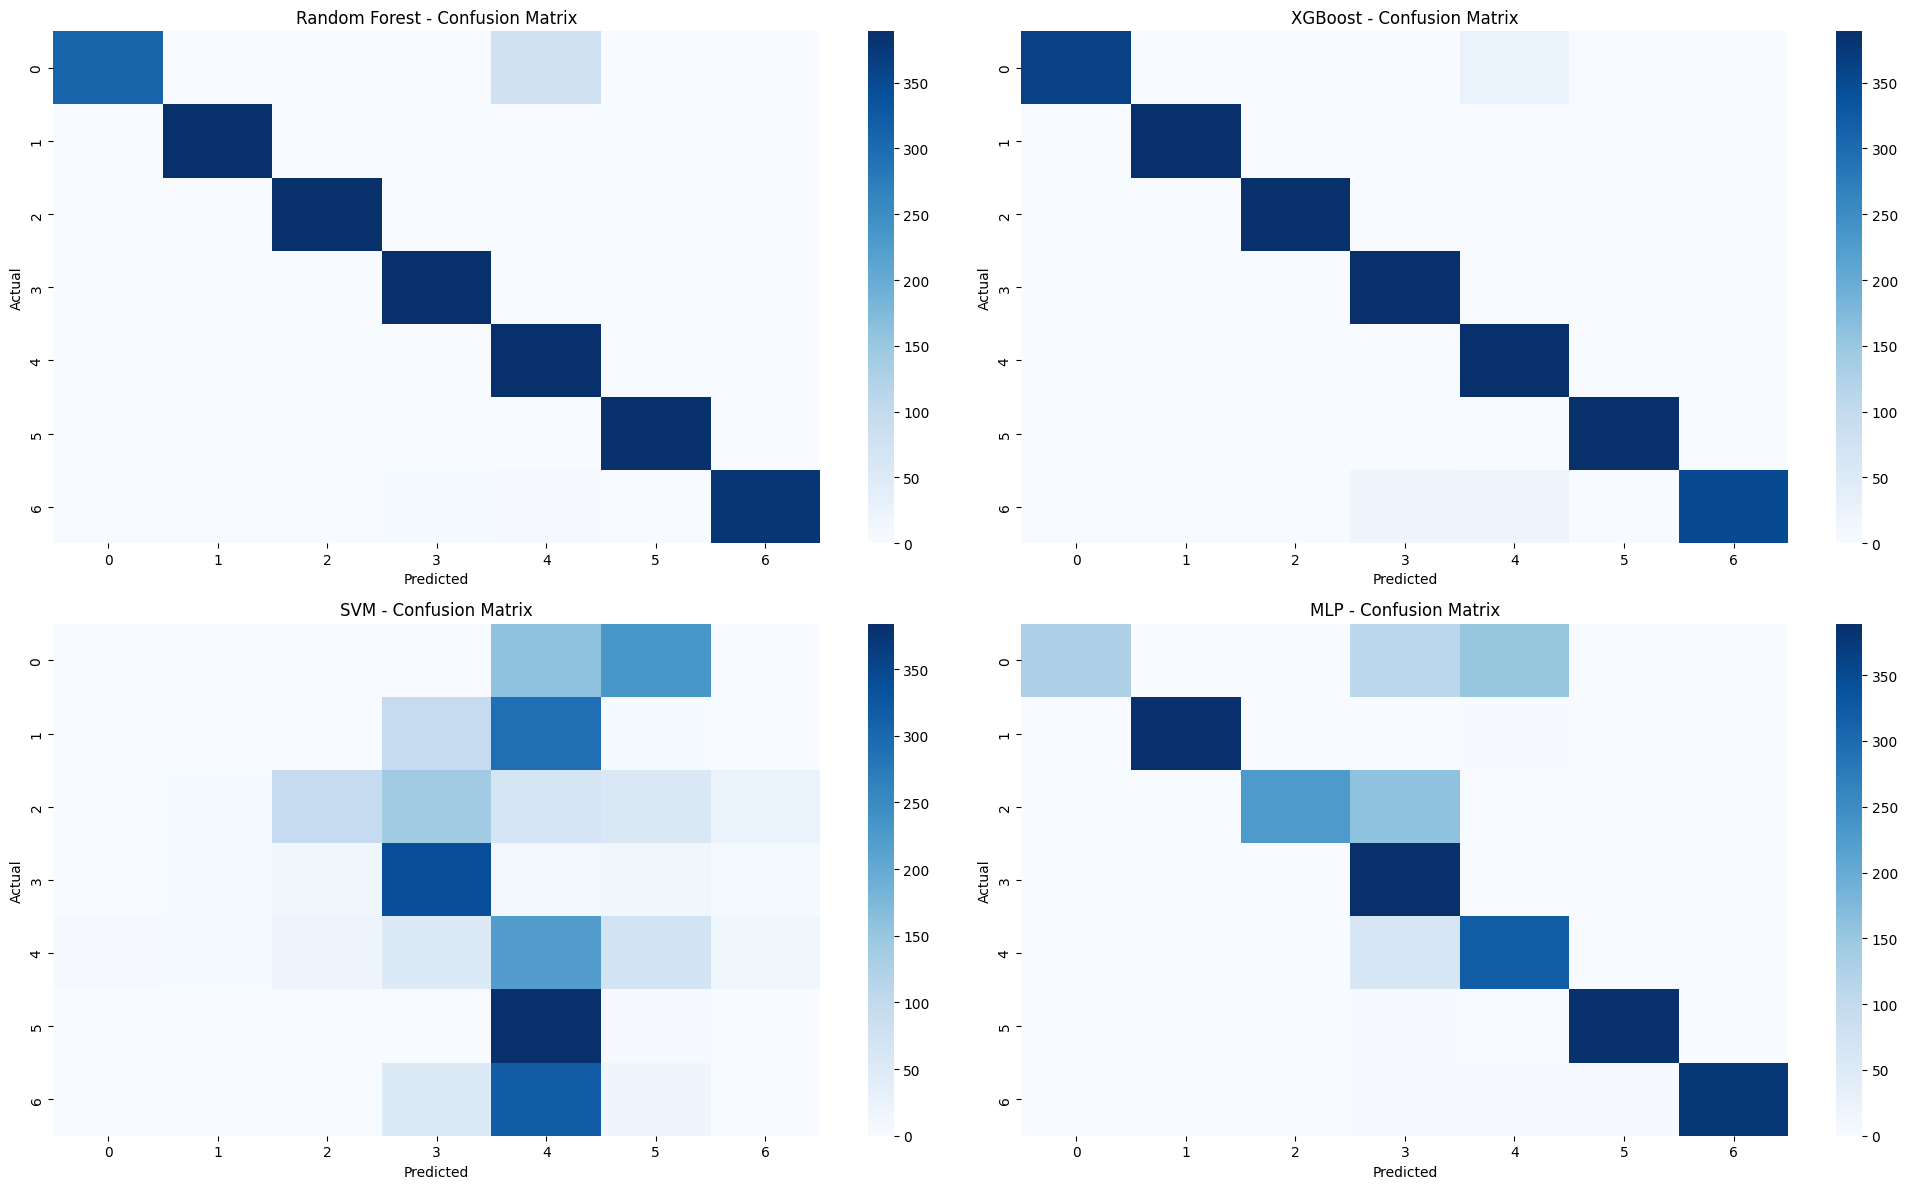

In [22]:
models = {
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred,
    "SVM": svm_pred,
    "MLP": mlp_pred
}

plt.figure(figsize=(20,12))

for i, (name, pred) in enumerate(models.items(), 1):
    plt.subplot(2,2,i)
    cm = confusion_matrix(y_test_balanced, pred)
    sns.heatmap(cm, annot=False, cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


## ⭐ 9. Feature Importance Analysis

Understanding which network traffic features are most important for detecting attacks helps us interpret model decisions and potentially reduce feature dimensionality.

**Note:** Feature importance is only available for tree-based models (Random Forest and XGBoost). SVM and MLP don't provide direct feature importance measures.

### 9.1 Random Forest Feature Importance

**Purpose:** Identify which network traffic features Random Forest considers most important for classification.

**What this code does:**

**1. Extract Importances:**
```python
importances = rf.feature_importances_
```
- Returns array of importance scores (one per feature)
- Importance = how much each feature contributes to reducing impurity across all trees
- Calculated from how often feature is used and how much it improves splits

**2. Select Top 15:**
```python
indices = np.argsort(importances)[-15:]
```
- `np.argsort()`: Returns indices that would sort array
- `[-15:]`: Takes last 15 indices (highest importance scores)
- Focuses on most influential features

**3. Visualization:**
- Horizontal bar chart (easier to read feature names)
- `X.columns[indices]`: Maps indices back to feature names
- Longer bars = more important features

**How Random Forest Calculates Importance:**
- For each split in each tree:
  - Measure impurity decrease (Gini or entropy)
  - Attribute decrease to the splitting feature
- Average across all trees
- Normalize to sum to 1

**Interpretation:**
- **High importance features:** Strong indicators of attack vs normal traffic
- **Examples might include:**
  - Packet size statistics
  - Flow duration
  - Protocol-specific features
  - Byte/packet ratios
- **Use cases:**
  - Feature selection: Remove low-importance features
  - Domain understanding: Validate with cybersecurity knowledge
  - Real-time monitoring: Focus on high-importance features

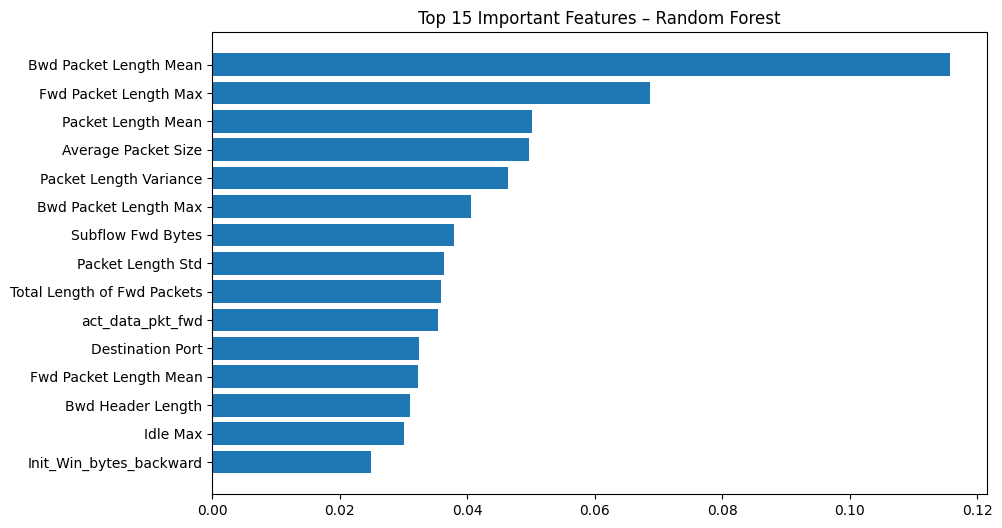

In [23]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 15 Important Features – Random Forest")
plt.show()


### 9.2 XGBoost Feature Importance

**Purpose:** Identify XGBoost's top features for intrusion detection and compare with Random Forest.

**What this code does:**

**1. Extract XGBoost Importances:**
```python
xgb_importances = xgb.feature_importances_
```
- XGBoost provides feature importance similar to Random Forest
- Based on how often feature is used for splitting
- Weighted by improvement to loss function

**2. Visualization:**
- Same format as Random Forest (horizontal bar chart, top 15)
- Allows direct visual comparison

**XGBoost vs Random Forest Importance:**

**Calculation Differences:**
- **Random Forest:** Average impurity decrease across independent trees
- **XGBoost:** Weighted by tree depth and boosting weights
- **XGBoost** importance influenced by sequential boosting process

**Expected Differences:**
- May have **overlapping top features** (fundamentally important)
- May have **different rankings** (different optimization objectives)
- XGBoost might prioritize features that correct errors from previous trees

**Comparison Strategy:**
1. **Consistent features:** Appear in both top 15 → highly reliable indicators
2. **RF-only features:** Important for general patterns
3. **XGBoost-only features:** Important for correcting specific errors

**Practical Application:**
- **Feature engineering:** Focus on consistently important features
- **Model ensemble:** Combine models that use different feature sets
- **Deployment:** Monitor top features for data drift
- **Security insights:** Understand what network characteristics distinguish attacks

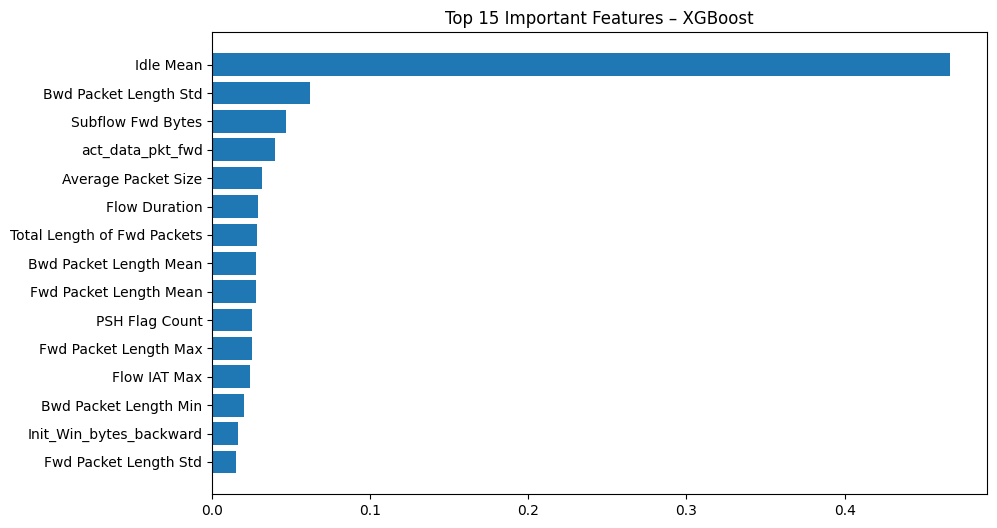

In [24]:
xgb_importances = xgb.feature_importances_
indices = np.argsort(xgb_importances)[-15:]

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), xgb_importances[indices], align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 15 Important Features – XGBoost")
plt.show()


In [25]:
# Calculating precision, recall, and F1 score for each model
precision_rf = precision_score(y_test_balanced, rf_pred, average='weighted')
recall_rf = recall_score(y_test_balanced, rf_pred, average='weighted')
f1_rf = f1_score(y_test_balanced, rf_pred, average='weighted')

precision_xgb = precision_score(y_test_balanced, xgb_pred, average='weighted')
recall_xgb = recall_score(y_test_balanced, xgb_pred, average='weighted')
f1_xgb = f1_score(y_test_balanced, xgb_pred, average='weighted')

precision_svm = precision_score(y_test_balanced, svm_pred, average='weighted')
recall_svm = recall_score(y_test_balanced, svm_pred, average='weighted')
f1_svm = f1_score(y_test_balanced, svm_pred, average='weighted')

precision_mlp = precision_score(y_test_balanced, mlp_pred, average='weighted')
recall_mlp = recall_score(y_test_balanced, mlp_pred, average='weighted')
f1_mlp = f1_score(y_test_balanced, mlp_pred, average='weighted')


## 📈 10. Comprehensive Performance Metrics

### Computing Detailed Metrics for All Models

**Purpose:** Calculate precision, recall, and F1-score for each model to enable comprehensive comparison.

**What this code does:**

Computes three key metrics for all four models using `average='weighted'`:

**Metrics Explained:**

**1. Precision (weighted average):**
```python
precision_score(y_test_balanced, predictions, average='weighted')
```
- **Question answered:** "Of all samples predicted as class X, how many were actually class X?"
- **Formula:** True Positives / (True Positives + False Positives)
- **Weighted:** Averages precision across classes, weighted by class support (sample count)
- **High precision:** Few false positives (few false alarms)

**2. Recall (weighted average):**
```python
recall_score(y_test_balanced, predictions, average='weighted')
```
- **Question answered:** "Of all actual class X samples, how many did we detect?"
- **Formula:** True Positives / (True Positives + False Negatives)
- **Weighted:** Averages recall across classes, weighted by class support
- **High recall:** Few false negatives (few missed attacks)

**3. F1-Score (weighted average):**
```python
f1_score(y_test_balanced, predictions, average='weighted')
```
- **Question answered:** "What's the balance between precision and recall?"
- **Formula:** 2 × (Precision × Recall) / (Precision + Recall)
- **Harmonic mean:** Penalizes extreme imbalances
- **High F1:** Good balance of precision and recall

**Why Weighted Average?**
- Different attack types have different sample counts in test set
- Weighted average gives more importance to classes with more samples
- More representative of overall performance than macro average
- Useful when class imbalance exists (even after resampling)

**Intrusion Detection Context:**
- **High Precision:** Reduces alert fatigue (fewer false alarms)
- **High Recall:** Catches more attacks (security priority)
- **F1-Score:** Balances both (ideal for production systems)

### Creating Comprehensive Results DataFrame

**Purpose:** Consolidate all model performance metrics into a single comparison table.

**What this code does:**

**1. DataFrame Construction:**
```python
pd.DataFrame({
    "Model": [...],
    "CV Mean": [...],
    "CV Std": [...],
    "Test Accuracy": [...],
    "Precision": [...],
    "Recall": [...],
    "F1 Score": [...]
})
```

**Columns Explained:**

- **Model:** Model name (Random Forest, XGBoost, SVM, MLP)

- **CV Mean:** Average cross-validation score (3 folds)
  - Measures: Training data generalization
  - Higher = Better generalization

- **CV Std:** Standard deviation of CV scores
  - Measures: Performance consistency
  - Lower = More stable/reliable
  - High std = model sensitive to data splits

- **Test Accuracy:** Performance on held-out test set
  - Measures: Real-world performance estimate
  - Most important single metric

- **Precision:** Weighted average precision
  - Measures: False positive rate
  - Critical for: Reducing alert fatigue

- **Recall:** Weighted average recall
  - Measures: Detection rate
  - Critical for: Security (catching attacks)

- **F1 Score:** Harmonic mean of precision and recall
  - Measures: Overall balance
  - Critical for: Production deployment decisions

**This Table Enables:**
1. **Direct comparison** of all models on all metrics
2. **Ranking** models by different priorities (security vs efficiency)
3. **Model selection** based on specific requirements:
   - **Highest accuracy?** Choose top Test Accuracy
   - **Most consistent?** Choose lowest CV Std
   - **Best balance?** Choose highest F1 Score
   - **Catch everything?** Choose highest Recall
   - **Minimize false alarms?** Choose highest Precision

**Example Decision Making:**
- **Security-critical system:** Prioritize Recall (don't miss attacks)
- **High-volume network:** Prioritize Precision (reduce false alarms)
- **Balanced deployment:** Prioritize F1 Score

In [26]:
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "SVM", "MLP"],
    "CV Mean": [
        cv_scores_rf.mean(), cv_xgb.mean(), cv_svm.mean(), cv_mlp.mean()
    ],
    "CV Std": [
        cv_scores_rf.std(), cv_xgb.std(), cv_svm.std(), cv_mlp.std()
    ],
    "Test Accuracy": [
        accuracy_rf, accuracy_xgb, accuracy_svm, accuracy_mlp
    ],
    'Precision': [precision_rf, precision_xgb, precision_svm, precision_mlp],
    'Recall': [recall_rf, recall_xgb, recall_svm, recall_mlp],
    'F1 Score': [f1_rf, f1_xgb, f1_svm, f1_mlp],
})

results


,Model,CV Mean,CV Std,Test Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.998342,0.000063,0.966214,0.972011,0.966214,0.966162
1,XGBoost,0.997262,0.000089,0.974293,0.976704,0.974293,0.974388
2,SVM,0.490193,0.003967,0.243114,0.198907,0.243114,0.179815
3,MLP,0.846658,0.001257,0.814176,0.883658,0.814176,0.805640


## 📊 11. Visual Model Performance Comparison

### Dual-Panel Performance Comparison Chart

**Purpose:** Create comprehensive visual comparison of all models across all metrics in an easy-to-understand format.

**What this code does:**

**1. Figure Layout:**
```python
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
```
- Creates figure with 2 side-by-side panels
- Left panel: Accuracy metrics
- Right panel: Precision/Recall/F1 metrics

**2. Left Panel - Accuracy Comparison:**
```python
results.set_index('Model')[['Test Accuracy', 'CV Mean']].plot(kind='bar', ...)
```
- **Test Accuracy:** Performance on unseen data (most important)
- **CV Mean:** Average cross-validation score (generalization estimate)
- **Bar chart:** Easy visual comparison
- **Y-axis range (0.95, 1.0):** Zooms in to show differences (all models perform well)

**Why Compare These?**
- **Test > CV:** Model may have overfit or gotten lucky
- **CV > Test:** Model generalizes better to similar data
- **Close match:** Healthy, well-generalized model
- **High CV Std (from table):** Performance varies, less reliable

**3. Right Panel - Detailed Metrics:**
```python
results.set_index('Model')[['Precision', 'Recall', 'F1 Score']].plot(kind='bar, ...)
```
- **Three bars per model** show trade-offs:
  - **Precision (orange):** Correctness of positive predictions
  - **Recall (pink):** Completeness of positive detection
  - **F1 (yellow-green):** Balanced measure

**Interpretation Patterns:**

**Balanced Model:**
- Precision ≈ Recall ≈ F1 (all three bars similar height)
- Good all-around performance

**High Precision, Lower Recall:**
- Conservative model (fewer false alarms, but misses some attacks)
- Good for: Low-tolerance environments

**High Recall, Lower Precision:**
- Aggressive model (catches most attacks, but more false alarms)
- Good for: Security-critical environments

**What to Look For:**
1. **Highest bars overall:** Best performing model
2. **Consistent heights:** Balanced performance
3. **Gaps between metrics:** Trade-offs to consider
4. **Model ranking changes:** Different models excel at different metrics

**Decision Guide:**
- **All metrics similar?** Choose simplest/fastest model (Random Forest)
- **One model clearly best?** Choose that model
- **Different strengths?** Consider ensemble of complementary models
- **Deployment constraints?** Factor in training time, prediction speed, interpretability

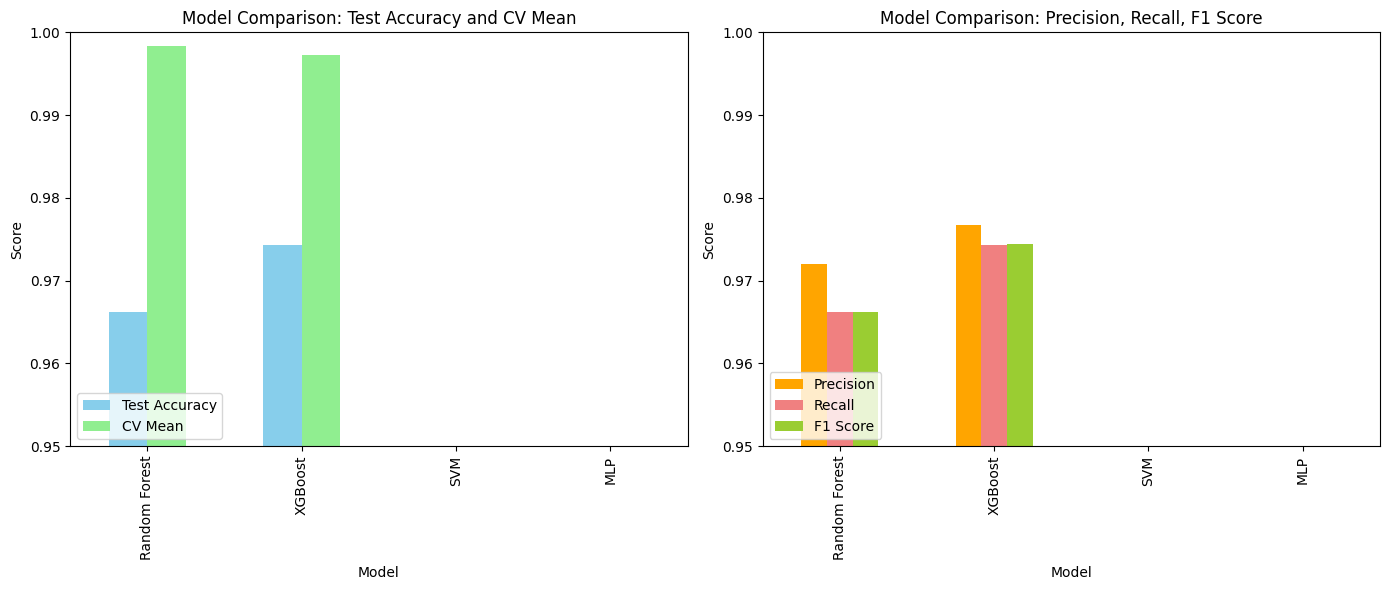

In [27]:
# Plotting the comparison for accuracy, cross-validation, and metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Using 1 row and 2 columns

# Plotting Test Accuracy and CV Mean
results.set_index('Model')[['Test Accuracy', 'CV Mean']].plot(
    kind='bar', 
    ax=axes[0], 
    color=['skyblue', 'lightgreen'], 
    legend=True
)
axes[0].set_title('Model Comparison: Test Accuracy and CV Mean')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Model')
axes[0].set_ylim(0.95, 1.0)  # Adjust if necessary
axes[0].legend(loc='lower left')

# Plotting Precision, Recall, F1 Score
results.set_index('Model')[['Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', 
    ax=axes[1], 
    color=['orange', 'lightcoral', 'yellowgreen'], 
    legend=True
)
axes[1].set_title('Model Comparison: Precision, Recall, F1 Score')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Model')
axes[1].set_ylim(0.95, 1.0)  # Adjust if necessary
axes[1].legend(loc='lower left')

plt.tight_layout()
plt.show()

## 🔄 12. Methodology Pipeline Flowchart

This section visualizes the complete methodology pipeline from raw data to model evaluation.

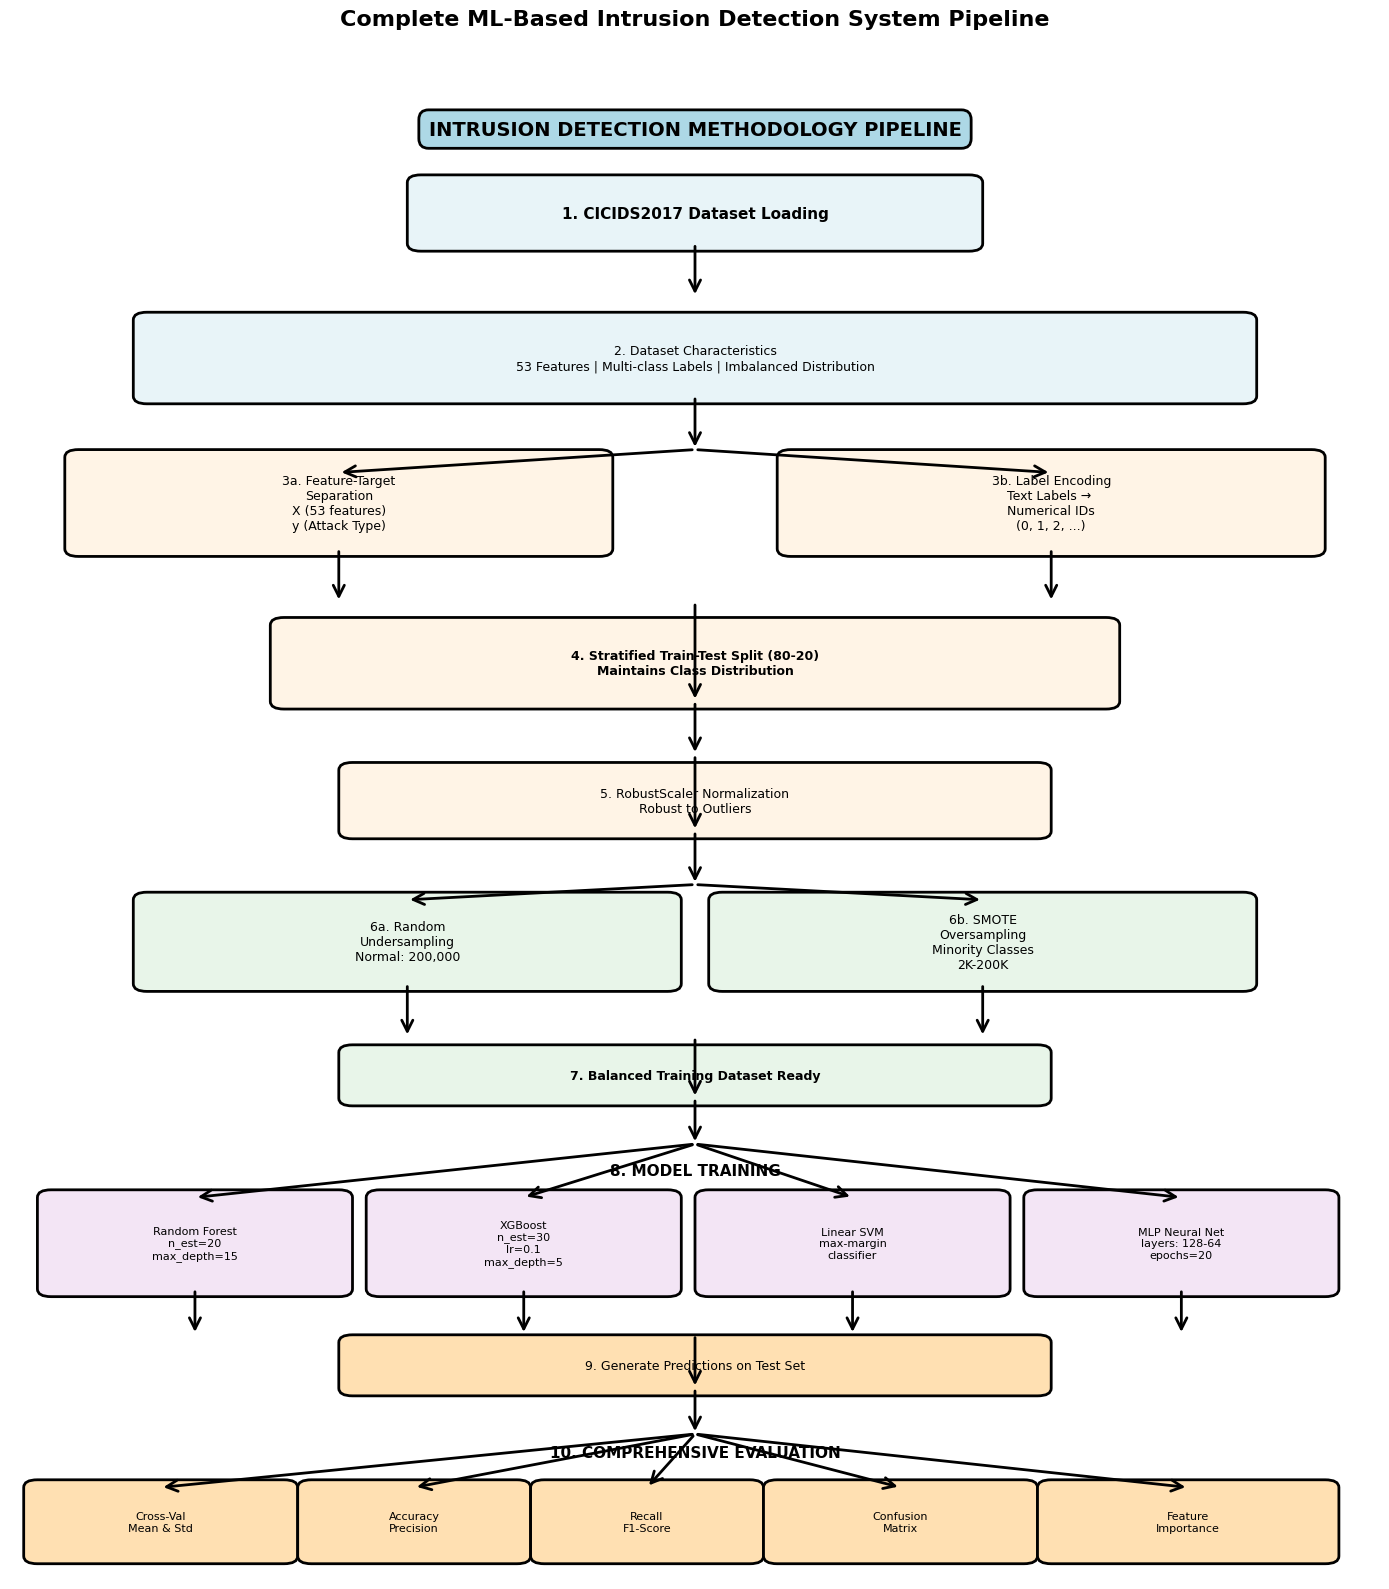

✅ Methodology pipeline flowchart created successfully!
📊 The diagram shows the complete workflow from data loading to model evaluation.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Create figure
fig, ax = plt.subplots(figsize=(14, 16))
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)
ax.axis('off')

# Define colors
color_data = '#E8F4F8'
color_preprocess = '#FFF4E6'
color_resample = '#E8F5E9'
color_model = '#F3E5F5'
color_eval = '#FFE0B2'

# Helper function to create boxes
def create_box(ax, x, y, width, height, text, color, fontsize=10, bold=False):
    box = FancyBboxPatch((x, y), width, height, boxstyle="round,pad=0.1",
                         edgecolor='black', facecolor=color, linewidth=2)
    ax.add_patch(box)
    weight = 'bold' if bold else 'normal'
    ax.text(x + width/2, y + height/2, text, ha='center', va='center',
            fontsize=fontsize, weight=weight, wrap=True)

# Helper function for arrows
def create_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch((x1, y1), (x2, y2), arrowstyle='->', 
                           mutation_scale=20, linewidth=2, color='black')
    ax.add_patch(arrow)

# Title
ax.text(5, 19, 'INTRUSION DETECTION METHODOLOGY PIPELINE', 
        ha='center', va='center', fontsize=14, weight='bold',
        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', edgecolor='black', linewidth=2))

# 1. Data Acquisition
create_box(ax, 3, 17.5, 4, 0.8, '1. CICIDS2017 Dataset Loading', color_data, 11, True)
create_arrow(ax, 5, 17.5, 5, 16.8)

# 2. Dataset Characteristics
create_box(ax, 1, 15.5, 8, 1, 
           '2. Dataset Characteristics\n53 Features | Multi-class Labels | Imbalanced Distribution',
           color_data, 9)
create_arrow(ax, 5, 15.5, 5, 14.8)

# 3. Preprocessing Phase (Left Branch)
create_box(ax, 0.5, 13.5, 3.8, 1.2, 
           '3a. Feature-Target\nSeparation\nX (53 features)\ny (Attack Type)',
           color_preprocess, 9)
create_box(ax, 5.7, 13.5, 3.8, 1.2,
           '3b. Label Encoding\nText Labels → \nNumerical IDs\n(0, 1, 2, ...)',
           color_preprocess, 9)
create_arrow(ax, 5, 14.8, 2.4, 14.5)
create_arrow(ax, 5, 14.8, 7.6, 14.5)
create_arrow(ax, 2.4, 13.5, 2.4, 12.8)
create_arrow(ax, 7.6, 13.5, 7.6, 12.8)

# 4. Train-Test Split
create_box(ax, 2, 11.5, 6, 1,
           '4. Stratified Train-Test Split (80-20)\nMaintains Class Distribution',
           color_preprocess, 9, True)
create_arrow(ax, 5, 12.8, 5, 11.5)
create_arrow(ax, 5, 11.5, 5, 10.8)

# 5. Feature Scaling
create_box(ax, 2.5, 9.8, 5, 0.8,
           '5. RobustScaler Normalization\nRobust to Outliers',
           color_preprocess, 9)
create_arrow(ax, 5, 10.8, 5, 9.8)
create_arrow(ax, 5, 9.8, 5, 9.1)

# 6. Class Imbalance Handling (Two Stages)
create_box(ax, 1, 7.8, 3.8, 1.1,
           '6a. Random\nUndersampling\nNormal: 200,000',
           color_resample, 9)
create_box(ax, 5.2, 7.8, 3.8, 1.1,
           '6b. SMOTE\nOversampling\nMinority Classes\n2K-200K',
           color_resample, 9)
create_arrow(ax, 5, 9.1, 2.9, 8.9)
create_arrow(ax, 5, 9.1, 7.1, 8.9)
create_arrow(ax, 2.9, 7.8, 2.9, 7.1)
create_arrow(ax, 7.1, 7.8, 7.1, 7.1)

# 7. Balanced Dataset
create_box(ax, 2.5, 6.3, 5, 0.6,
           '7. Balanced Training Dataset Ready',
           color_resample, 9, True)
create_arrow(ax, 5, 7.1, 5, 6.3)
create_arrow(ax, 5, 6.3, 5, 5.7)

# 8. Model Training (Four Models)
ax.text(5, 5.3, '8. MODEL TRAINING', ha='center', fontsize=11, weight='bold')
create_box(ax, 0.3, 3.8, 2.1, 1.2,
           'Random Forest\nn_est=20\nmax_depth=15',
           color_model, 8)
create_box(ax, 2.7, 3.8, 2.1, 1.2,
           'XGBoost\nn_est=30\nlr=0.1\nmax_depth=5',
           color_model, 8)
create_box(ax, 5.1, 3.8, 2.1, 1.2,
           'Linear SVM\nmax-margin\nclassifier',
           color_model, 8)
create_box(ax, 7.5, 3.8, 2.1, 1.2,
           'MLP Neural Net\nlayers: 128-64\nepochs=20',
           color_model, 8)

create_arrow(ax, 5, 5.7, 1.35, 5.0)
create_arrow(ax, 5, 5.7, 3.75, 5.0)
create_arrow(ax, 5, 5.7, 6.15, 5.0)
create_arrow(ax, 5, 5.7, 8.55, 5.0)

create_arrow(ax, 1.35, 3.8, 1.35, 3.2)
create_arrow(ax, 3.75, 3.8, 3.75, 3.2)
create_arrow(ax, 6.15, 3.8, 6.15, 3.2)
create_arrow(ax, 8.55, 3.8, 8.55, 3.2)

# 9. Predictions
create_box(ax, 2.5, 2.5, 5, 0.6,
           '9. Generate Predictions on Test Set',
           color_eval, 9)
create_arrow(ax, 5, 3.2, 5, 2.5)
create_arrow(ax, 5, 2.5, 5, 1.9)

# 10. Evaluation Metrics
ax.text(5, 1.6, '10. COMPREHENSIVE EVALUATION', ha='center', fontsize=11, weight='bold')
create_box(ax, 0.2, 0.3, 1.8, 0.9,
           'Cross-Val\nMean & Std',
           color_eval, 8)
create_box(ax, 2.2, 0.3, 1.5, 0.9,
           'Accuracy\nPrecision',
           color_eval, 8)
create_box(ax, 3.9, 0.3, 1.5, 0.9,
           'Recall\nF1-Score',
           color_eval, 8)
create_box(ax, 5.6, 0.3, 1.8, 0.9,
           'Confusion\nMatrix',
           color_eval, 8)
create_box(ax, 7.6, 0.3, 2, 0.9,
           'Feature\nImportance',
           color_eval, 8)

create_arrow(ax, 5, 1.9, 1.1, 1.2)
create_arrow(ax, 5, 1.9, 2.95, 1.2)
create_arrow(ax, 5, 1.9, 4.65, 1.2)
create_arrow(ax, 5, 1.9, 6.5, 1.2)
create_arrow(ax, 5, 1.9, 8.6, 1.2)

plt.title('Complete ML-Based Intrusion Detection System Pipeline', 
          fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.savefig('methodology_pipeline.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Methodology pipeline flowchart created successfully!")
print("📊 The diagram shows the complete workflow from data loading to model evaluation.")